In [48]:
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error




# Lade die CSV-Datei (angenommen, die Datei heißt "data.csv")
data = pd.read_csv("initial_data.csv")

# Teile die Daten in Features (X) und Ziel (y) auf
x = data[["Engine speed", "Engine load", "Railpressure", "Air supply", "Crank angle", "Intake pressure", "Back pressure", "Intake temperature"]].values
y = data[["NOx", "PM 1", "CO2", "PM 2", "Pressure cylinder"]].values

# Teile die Daten in Trainings- und Testsets auf
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

# Standardisiere die Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Trainiere ein Support Vector Regressor (SVR)-Modell
print(X_train_scaled.shape)
svr = SVR(kernel="linear", C=1, epsilon=0.1)
multi_output_svr = MultiOutputRegressor(svr)
multi_output_svr.fit(X_train, y_train)

# Mache Vorhersagen auf dem Testset
y_pred = multi_output_svr.predict(X_test_scaled)





(90, 8)


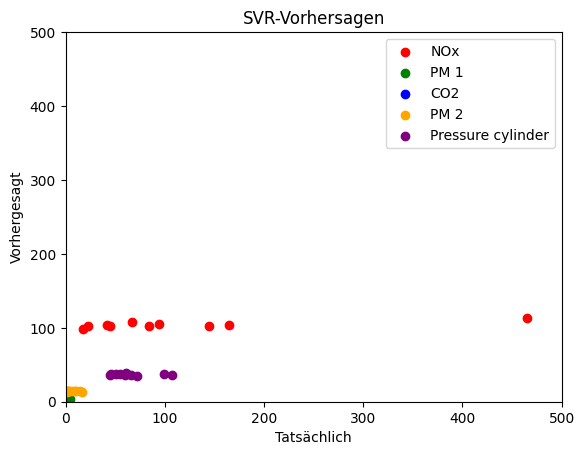

In [49]:

# Zeige die SVR-Vorhersagen in einem Diagramm
plt.xlim(0,500)
plt.ylim(0,500)
plt.scatter(y_test[:, 0], y_pred[:, 0], color="red", label="NOx")
plt.scatter(y_test[:, 1], y_pred[:, 1], color="green", label="PM 1")
plt.scatter(y_test[:, 2], y_pred[:, 2], color="blue", label="CO2")
plt.scatter(y_test[:, 3], y_pred[:, 3], color="orange", label="PM 2")
plt.scatter(y_test[:, 4], y_pred[:, 4], color="purple", label="Pressure cylinder")
plt.xlabel("Tatsächlich")
plt.ylabel("Vorhergesagt")
plt.title("SVR-Vorhersagen")
plt.legend()
plt.show()

In [50]:
# Berechne die Abweichung (Residuen) für jedes Ausgabeattribut
residuen = y_test - y_pred

# Berechne den durchschnittlichen absoluten Fehler für jedes Ausgabeattribut
mae = np.mean(np.abs(residuen), axis=0)
for i in range(0,5):
    mse = mean_squared_error(y_test[:,i], y_pred[:,i])
    #print(str(i) + ". mse: " + str(mse))
    varianz = np.var(y_test[:,i])
    print("normalisiert \t" + str(mse/varianz))

# Gib die durchschnittlichen absoluten Fehler für jedes Ausgabeattribut aus
for i in range(y_test.shape[1]):
    print(f"Durchschnittlicher absoluter Fehler für Ausgabespalte {i+1}: {mae[i]}")

normalisiert 	0.9609691204413443
normalisiert 	1.7355522258762623
normalisiert 	4.111843153988227
normalisiert 	2.87074121729245
normalisiert 	3.0822124530882813
Durchschnittlicher absoluter Fehler für Ausgabespalte 1: 80.51595998273602
Durchschnittlicher absoluter Fehler für Ausgabespalte 2: 1.6316308002015378
Durchschnittlicher absoluter Fehler für Ausgabespalte 3: 55.403409462973286
Durchschnittlicher absoluter Fehler für Ausgabespalte 4: 7.705979165004147
Durchschnittlicher absoluter Fehler für Ausgabespalte 5: 29.1931568818156


In [51]:
yo = pd.DataFrame(y_pred)
for i in range(0,5):
    print(str(y_pred[:,i].min()) + " - " +str(y_pred[:,i].max()))
print("-----")
for i in range(0,5):
    print(str(y[:,i].min()) + " - " +str(y[:,i].max()))


98.22990869471116 - 112.74557649862751
3.035112737283797 - 3.5933812409693506
-14.970128892131266 - -13.028225963503951
13.64501891615627 - 14.657087834436064
35.42587798781938 - 38.52047541731739
-----
17.977837673560735 - 703.8246607171793
0.1511387322084335 - 5.698707405990675
2.8916283610802 - 163.08052044212317
0.7220990913233775 - 16.283255006155805
44.94630187431548 - 160.04737531670222


In [52]:
for i in range(0,5):
    #mape = sklearn.mean(np.abs((y_test[:,i] - y_pred[:,i])/y_test[:,i])) * 100
    mape= mean_absolute_percentage_error(y_test[:,i], y_pred[:,i]) * 100
    print(mape)


131.8568595619145
496.37528574436203
224.5684579696115
318.5434557878063
39.45067813093432


In [53]:
data = pd.read_csv("initial_data.csv")
submission_data = pd.read_csv("submission.csv")

submission_keys = submission_data.keys()
data_keys = ['Engine speed', 'Engine load', 'Railpressure', 'Air supply', 'Crank angle', 'Intake pressure', 'Back pressure', 'Intake temperature']

for sub_key, data_key in zip(submission_keys, data_keys):
    submission_data = submission_data.rename(columns={sub_key:data_key})


print(submission_data.shape)


submission_results = multi_output_svr.predict(submission_data.values)

submission_results = np.transpose(submission_results)
submission_mean = []
submission_std = []
for feature in submission_results:
    submission_mean.append(feature.mean())
    submission_std.append(feature.std())

data_mean = []
data_std = []
y_t = np.transpose(y)
for feature in y_t:
    data_mean.append(feature.mean())
    data_std.append(feature.std())

print(submission_mean)
print(submission_std)
print(data_mean)
print(data_std)

q_mean = np.divide(data_mean, submission_mean)
q_std = np.divide(data_std, submission_std)

print("\nQuotienten von mean und std:\n")
print(q_mean)
print(q_std)




(57892, 8)
[262.0146557028242, 6.136146838402113, 50.85176924979589, 12.731565336996324, 123.76825448268326]
[192.44373850917654, 4.254938088042669, 71.44473727286345, 10.281961816381541, 58.68314028269838]
[170.29038340772263, 1.9017370773289528, 59.82909918594736, 5.450735423650851, 82.80317930585645]
[133.46353940994078, 1.2994464881311643, 40.13581656586497, 3.044101809402742, 28.307689406862803]
